In [ ]:
# Import necessary librariess 
import pandas as pd

# Load the Excel file
file_path = "D600 Task 2 Dataset 1 Housing Information.xlsx"  # Update with the correct file path if needed
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print("Dataset Loaded Successfully!")
print(df.head())

Dataset Loaded Successfully!
     ID        Price  SquareFootage  NumBathrooms  NumBedrooms  BackyardSpace  \
0  4922  255614.8992         566.62      1.000000            4         779.42   
1  5009  155586.0947        1472.34      1.000000            2         656.13   
2  4450  131050.8324         550.00      1.779354            3         754.57   
3  1070  151361.7125         941.81      2.035254            2         439.59   
4   400  113167.6128         550.00      1.064644            3         353.03   

   CrimeRate  SchoolRating  AgeOfHome  DistanceToCityCenter  ...  \
0      20.56          5.62      39.46                 10.08  ...   
1      15.62          5.63      40.51                  7.89  ...   
2      12.47          9.20      48.38                 23.74  ...   
3      22.22          7.08      94.67                  5.22  ...   
4       8.28          5.93      16.80                 43.13  ...   

   RenovationQuality  LocalAmenities  TransportAccess  Fireplace  HouseColo

In [ ]:
# Descriptive statistics for dependent and independent variables
selected_columns = ['IsLuxury', 'SquareFootage', 'NumBathrooms', 'NumBedrooms', 'CrimeRate', 
                    'SchoolRating', 'LocalAmenities', 'TransportAccess']
descriptive_stats = df[selected_columns].describe()

# Display descriptive statisticss
print("Descriptive Statistics:")
print(descriptive_stats)

# Calculate mode and range for each variable
modes = df[selected_columns].mode().iloc[0]
ranges = df[selected_columns].max() - df[selected_columns].min()

print("\nModes:")
print(modes)
print("\nRanges:")
print(ranges)

Descriptive Statistics:
         IsLuxury  SquareFootage  NumBathrooms  NumBedrooms    CrimeRate  \
count  7000.00000    7000.000000   7000.000000  7000.000000  7000.000000   
mean      0.50400    1048.947459      2.131397     3.008571    31.226194   
std       0.50002     426.010482      0.952561     1.021940    18.025327   
min       0.00000     550.000000      1.000000     1.000000     0.030000   
25%       0.00000     660.815000      1.290539     2.000000    17.390000   
50%       1.00000     996.320000      1.997774     3.000000    30.385000   
75%       1.00000    1342.292500      2.763997     4.000000    43.670000   
max       1.00000    2874.700000      5.807239     7.000000    99.730000   

       SchoolRating  LocalAmenities  TransportAccess  
count   7000.000000     7000.000000      7000.000000  
mean       6.942923        5.934579         5.983860  
std        1.888148        2.657930         1.953974  
min        0.220000        0.000000         0.010000  
25%        5.650

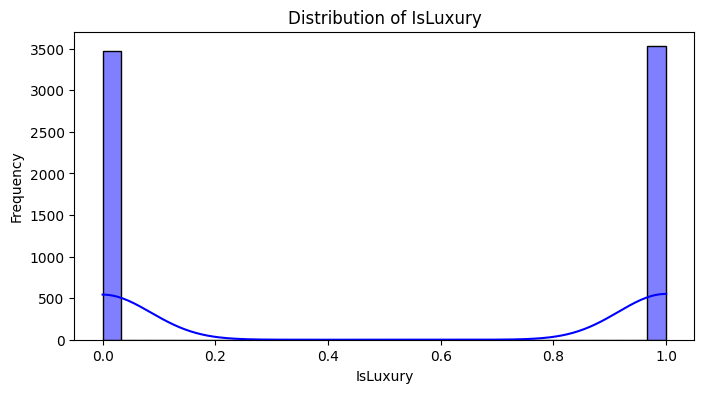

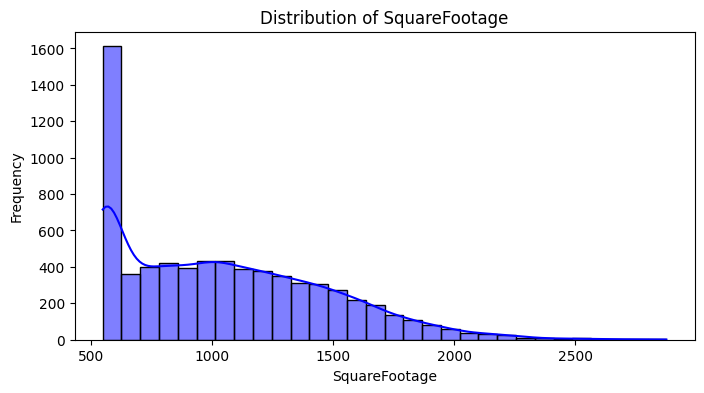

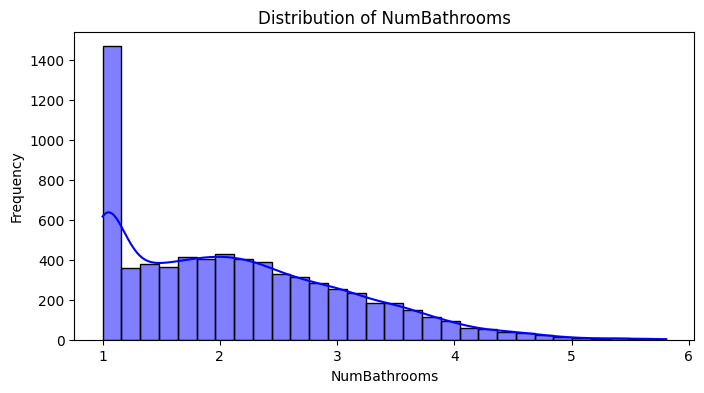

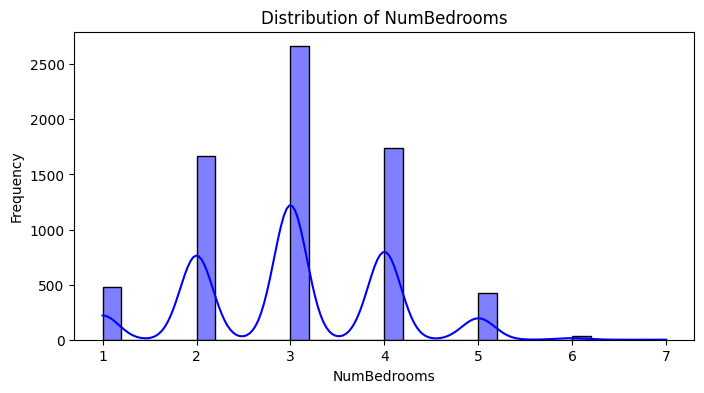

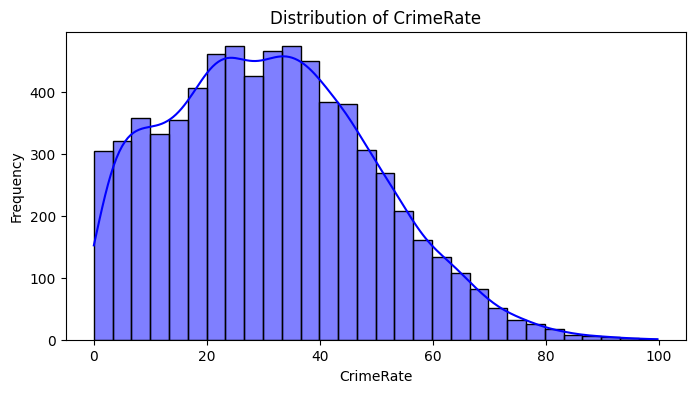

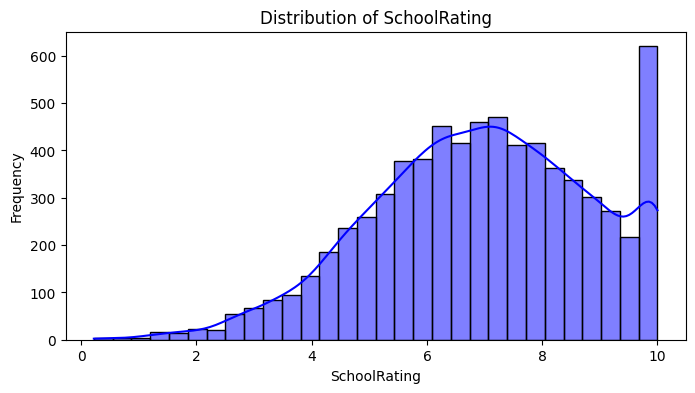

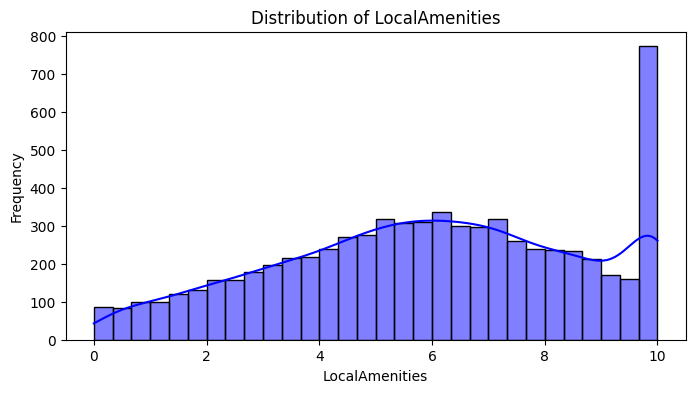

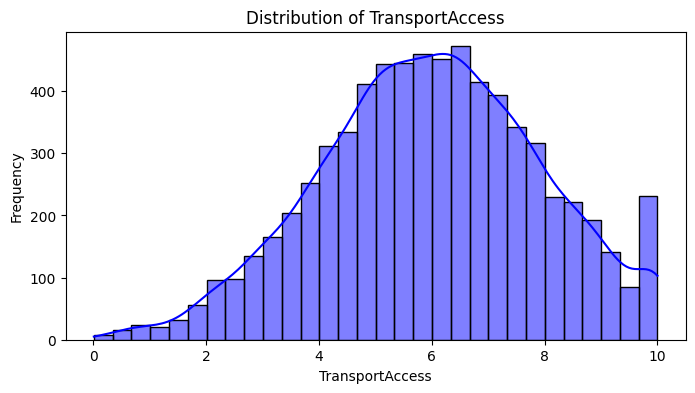

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate visualizationss
for column in selected_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

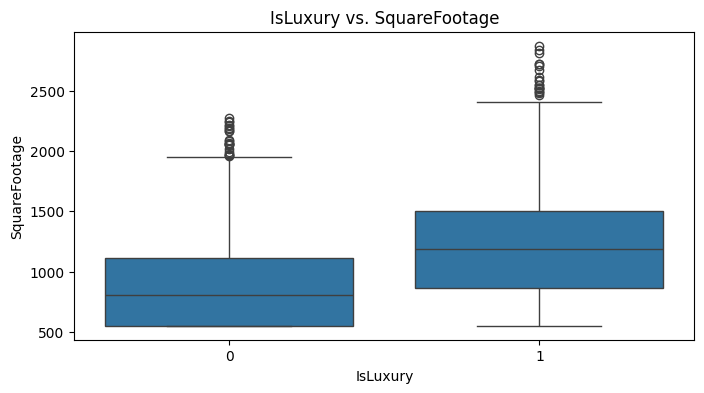

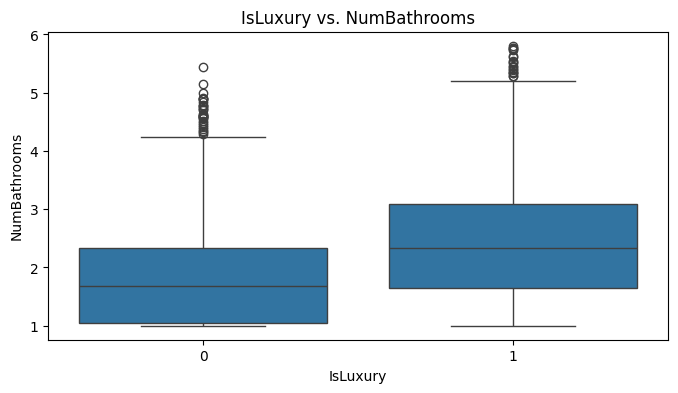

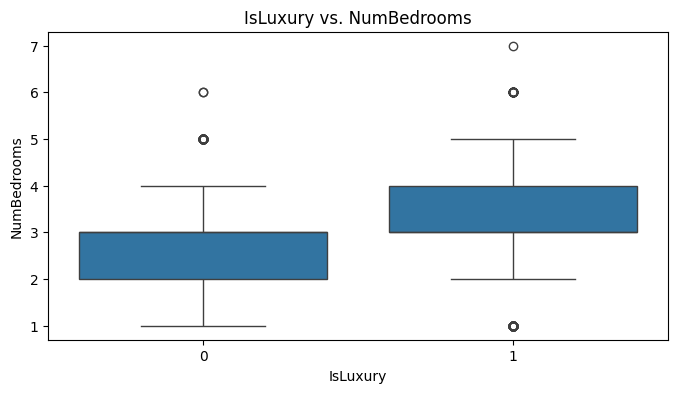

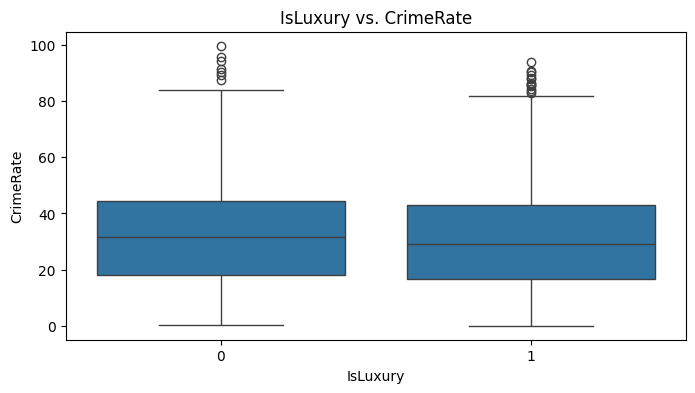

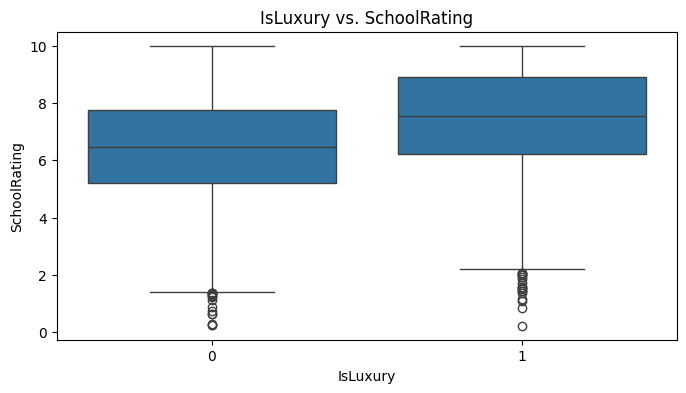

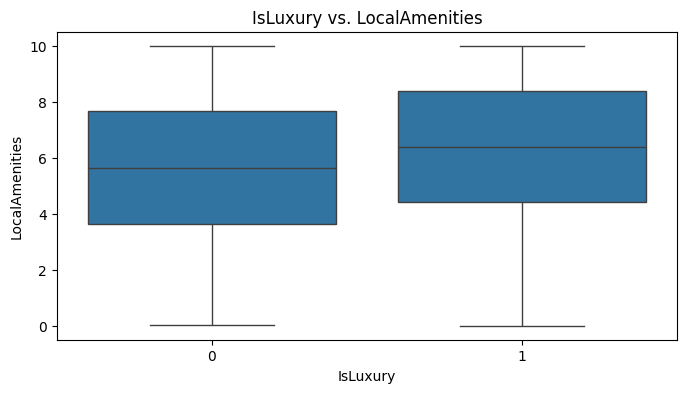

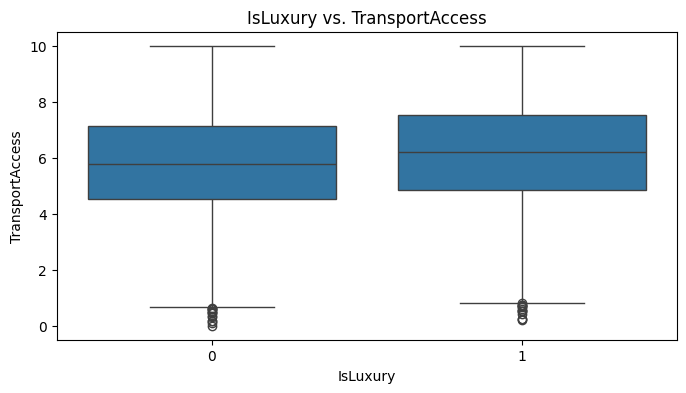

In [6]:
# Bivariate visualizations
for column in selected_columns[1:]:  # Skip 'IsLuxury' as it's the dependent variable
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df['IsLuxury'], y=df[column])
    plt.title(f"IsLuxury vs. {column}")
    plt.xlabel("IsLuxury")
    plt.ylabel(column)
    plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Select relevant columns
df_selected = df[selected_columns]

# Split the data
train_data, test_data = train_test_split(df_selected, test_size=0.2, random_state=42)

# Save the datasets
train_data.to_csv("training_data_task2d600.csv", index=False)
test_data.to_csv("test_datatask2d600.csv", index=False)

print("Training and test datasets have been saved.")

Training and test datasets have been saved.


In [9]:
import statsmodels.api as sm

# Separate the dependent and independent variables
X_train = train_data.drop(columns=['IsLuxury'])
y_train = train_data['IsLuxury']

# Add a constant for the intercept
X_train_const = sm.add_constant(X_train)

# Fit the initial logistic regression model
model = sm.Logit(y_train, X_train_const).fit()

# Perform backward stepwise elimination
while True:
    p_values = model.pvalues
    max_p_value = p_values.max()
    if max_p_value > 0.05:  # Remove variables with p-value > 0.05
        excluded_variable = p_values.idxmax()
        X_train_const = X_train_const.drop(columns=[excluded_variable])
        model = sm.Logit(y_train, X_train_const).fit()
    else:
        break

# Display the summary of the optimized model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.540121
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.540121
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.540122
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.540165
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               IsLuxury   No. Observations:                 5600
Model:                          Logit   Df Residuals:                     5595
Method:                           MLE   Df Model:                            4
Date:                Mon, 07 Apr 2025   Pseudo R-squ.:                  0.2206
Time:                        21:59:11   Log-Likelihood:                -3024.9
converged:                       True   LL-Null:                       -3881.2
Covariance Type:            nonrobust  

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predictions on the training set
y_train_pred = (model.predict(X_train_const) >= 0.5).astype(int)

# Confusion matrix and accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

print("Confusion Matrix (Training Set):")
print(conf_matrix_train)
print(f"Accuracy (Training Set): {accuracy_train:.2f}")

Confusion Matrix (Training Set):
[[2085  680]
 [ 738 2097]]
Accuracy (Training Set): 0.75


In [11]:
# Prepare the test dataset
X_test = test_data.drop(columns=['IsLuxury'])
y_test = test_data['IsLuxury']

# Add a constant for the intercept
X_test_const = sm.add_constant(X_test)

# Ensure only variables from the optimized model are used
X_test_const = X_test_const[X_train_const.columns]

# Predictions on the test set
y_test_pred = (model.predict(X_test_const) >= 0.5).astype(int)

# Confusion matrix and accuracy
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Confusion Matrix (Test Set):")
print(conf_matrix_test)
print(f"Accuracy (Test Set): {accuracy_test:.2f}")

Confusion Matrix (Test Set):
[[529 178]
 [164 529]]
Accuracy (Test Set): 0.76


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)


          Variable        VIF
0    SquareFootage   7.487322
1     NumBathrooms   6.173087
2      NumBedrooms  10.582629
3        CrimeRate   3.390784
4     SchoolRating  17.172478
5   LocalAmenities   7.884973
6  TransportAccess  12.147392


In [18]:
# Extract coefficients from the optimized logistic regression model
coefficients = model.params

# Construct the regression equation
equation = f"log-odds(IsLuxury) = {coefficients['const']:.4f}"  # Start with the intercept
for variable, coef in coefficients.items():
    if variable != "const":  # Skip the intercept
        sign = "+" if coef >= 0 else "-"
        equation += f" {sign} {abs(coef):.4f} * {variable}"

# Display the regression equation
print("Regression Equation:")
print(equation)

Regression Equation:
log-odds(IsLuxury) = -5.7208 + 0.0019 * SquareFootage + 0.6356 * NumBathrooms + 0.7164 * NumBedrooms + 0.0557 * LocalAmenities


In [19]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for the training set
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Training Set Confusion Matrix:")
print(train_conf_matrix)

# Confusion matrix for the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Test Set Confusion Matrix:")
print(test_conf_matrix)

Training Set Confusion Matrix:
[[2085  680]
 [ 738 2097]]
Test Set Confusion Matrix:
[[529 178]
 [164 529]]
